In [1]:
#シミュレーション可視化のための３Dアニメーション作成スクリプト
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [320]:
prop_r=25.4*6/1000/2
copter_L=0.18
frame_l=copter_L*np.sqrt(2)+0.03
frame_l_hf=frame_l/2
frame_w=0.03
frame_w_hf=frame_w/2
prop_loc_z=0.02

N=32
th=np.linspace(0, 2*np.pi, N)
prop_x=prop_r*np.cos(th)
prop_y=prop_r*np.sin(th)
prop_z=np.zeros(N)

_frame_x=np.array([ frame_l_hf, frame_w_hf, frame_w_hf,\
                  -frame_w_hf,-frame_w_hf,-frame_l_hf,\
                  -frame_l_hf,-frame_w_hf,-frame_w_hf,\
                   frame_w_hf, frame_w_hf, frame_l_hf,\
                   frame_l_hf])

_frame_y=np.array([ frame_w_hf, frame_w_hf, frame_l_hf,\
                   frame_l_hf, frame_w_hf, frame_w_hf,\
                  -frame_w_hf,-frame_w_hf,-frame_l_hf,\
                  -frame_l_hf,-frame_w_hf,-frame_w_hf,\
                   frame_w_hf])
frame_x=_frame_x*np.cos(-np.pi/4)-_frame_y*np.sin(-np.pi/4)
frame_y=_frame_x*np.sin(-np.pi/4)+_frame_y*np.cos(-np.pi/4)
frame_z=np.zeros(len(frame_x))

prop_fr_x=prop_x+copter_L/2
prop_fr_y=prop_y-copter_L/2
prop_fr_z=prop_z+prop_loc_z

prop_fl_x=prop_x+copter_L/2
prop_fl_y=prop_y+copter_L/2
prop_fl_z=prop_z+prop_loc_z

prop_rr_x=prop_x-copter_L/2
prop_rr_y=prop_y-copter_L/2
prop_rr_z=prop_z+prop_loc_z

prop_rl_x=prop_x-copter_L/2
prop_rl_y=prop_y+copter_L/2
prop_rl_z=prop_z+prop_loc_z

copter=((frame_x, frame_y, frame_z, 'c'),\
        (prop_fr_x, prop_fr_y, prop_fr_z, 'b'),\
        (prop_fl_x, prop_fl_y, prop_fl_z, 'b'),\
        (prop_rr_x, prop_rr_y, prop_rr_z, 'r'),\
        (prop_rl_x, prop_rl_y, prop_rl_z, 'r') )



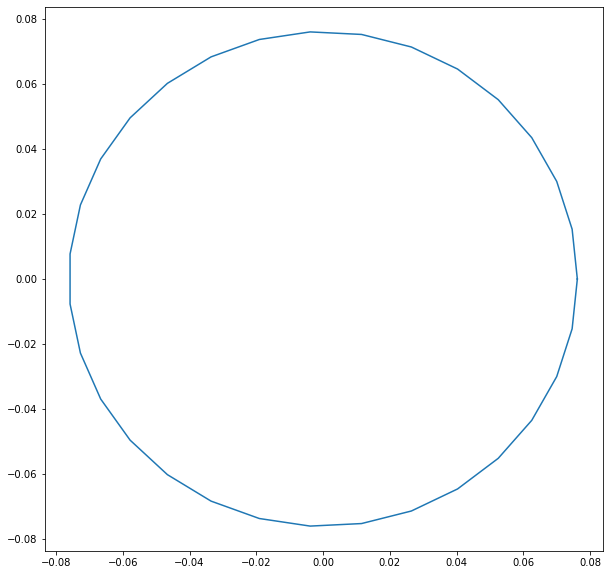

In [202]:
plt.figure(figsize=(10,10))
plt.plot(prop_x, prop_y)
plt.show()

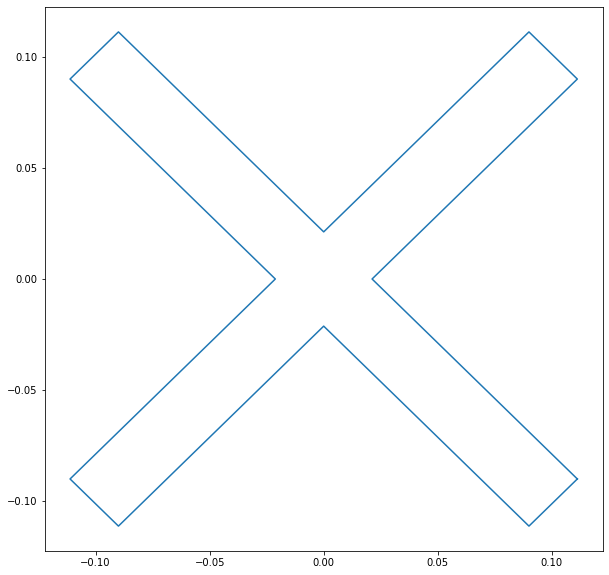

In [203]:
plt.figure(figsize=(10,10))
plt.plot(frame_x, frame_y)
plt.show()

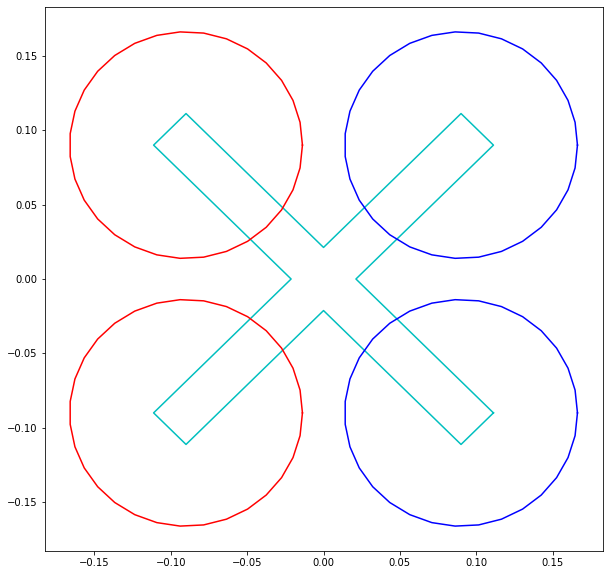

In [204]:
plt.figure(figsize=(10,10))
plt.plot(frame_x, frame_y, c='c')
plt.plot(prop_fr_x, prop_fr_y, c='b')
plt.plot(prop_fl_x, prop_fl_y, c='b')
plt.plot(prop_rr_x, prop_rr_y, c='r')
plt.plot(prop_rl_x, prop_rl_y, c='r')

plt.show()

In [247]:
def rot(euler,p):
    phi=euler[0]
    theta=euler[1]
    psi=euler[2]
    x1=p[0]
    y1=p[1]
    z1=p[2]
    
    e11= np.cos(theta)*np.cos(psi)
    e12= np.cos(theta)*np.sin(psi)
    e13=-np.sin(theta)
    
    e21= np.sin(phi)*np.sin(theta)*np.cos(psi) - np.cos(phi)*np.sin(psi)
    e22= np.sin(phi)*np.sin(theta)*np.sin(psi) + np.cos(phi)*np.cos(psi)
    e23= np.sin(phi)*np.cos(theta)
    
    e31= np.cos(phi)*np.sin(theta)*np.cos(psi) + np.sin(phi)*np.sin(psi)
    e32= np.cos(phi)*np.sin(theta)*np.sin(psi) - np.sin(phi)*np.cos(psi)
    e33= np.cos(phi)*np.cos(theta)
    
    x2=e11*x1 + e12*y1 + e13*z1
    y2=e21*x1 + e22*y1 + e23*z1
    z2=e31*x1 + e32*y1 + e33*z1
    
    
    return (x2,y2,z2)

def invrot(euler, p):
    phi=euler[0]
    theta=euler[1]
    psi=euler[2]
    x1=p[0]
    y1=p[1]
    z1=p[2]
    
    e11= np.cos(theta)*np.cos(psi)
    e12= np.cos(theta)*np.sin(psi)
    e13=-np.sin(theta)
    
    e21= np.sin(phi)*np.sin(theta)*np.cos(psi) - np.cos(phi)*np.sin(psi)
    e22= np.sin(phi)*np.sin(theta)*np.sin(psi) + np.cos(phi)*np.cos(psi)
    e23= np.sin(phi)*np.cos(theta)
    
    e31= np.cos(phi)*np.sin(theta)*np.cos(psi) + np.sin(phi)*np.sin(psi)
    e32= np.cos(phi)*np.sin(theta)*np.sin(psi) - np.sin(phi)*np.cos(psi)
    e33= np.cos(phi)*np.cos(theta)
    
    x2=e11*x1 + e21*y1 + e31*z1
    y2=e12*x1 + e22*y1 + e32*z1
    z2=e13*x1 + e23*y1 + e33*z1
    
    
    return [x2,y2,z2]

def tr(mv, p):
    x1=p[0]
    y1=p[1]
    z1=p[2]
    dx=mv[0]
    dy=mv[1]
    dz=mv[2]
    
    x2=x1+dx
    y2=y1+dy
    z2=z1+dz
    
    return [x2, y2, z2]

def pers(f,p):
    x1=p[0]
    y1=p[1]
    z1=p[2]
    
    x2=f*x1/z1
    y2=f*y1/z1
    
    return [x2, y2]


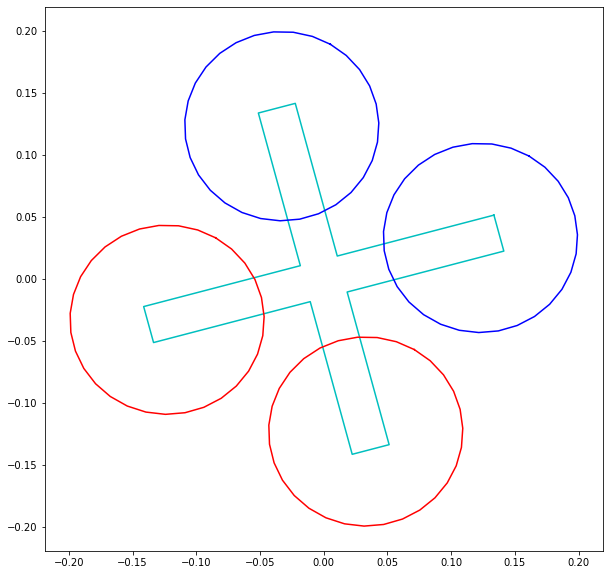

In [248]:
frame=invrot((0,0,np.pi/3),(frame_x,frame_y,frame_z))
prop_fr=invrot((0,0,np.pi/3),(prop_fr_x,prop_fr_y,prop_fr_z))
prop_fl=invrot((0,0,np.pi/3),(prop_fl_x,prop_fl_y,prop_fl_z))
prop_rr=invrot((0,0,np.pi/3),(prop_rr_x,prop_rr_y,prop_rr_z))
prop_rl=invrot((0,0,np.pi/3),(prop_rl_x,prop_rl_y,prop_rl_z))

plt.figure(figsize=(10,10))
plt.plot(frame[0], frame[1], c='c')
plt.plot(prop_fr[0], prop_fr[1], c='b')
plt.plot(prop_fl[0], prop_fl[1], c='b')
plt.plot(prop_rr[0], prop_rr[1], c='r')
plt.plot(prop_rl[0], prop_rl[1], c='r')

plt.show()

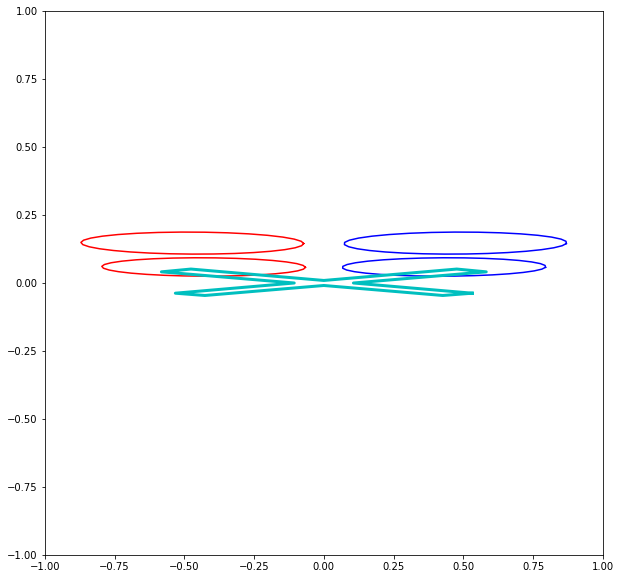

In [249]:
angle=(-85*np.pi/180,0,0)

move=(0,0,2)
f=10

_frame=invrot(angle,(frame_x,frame_y,frame_z))
_frame=tr(move,_frame)
_frame=pers(f,_frame)

_prop_fr=invrot(angle,(prop_fr_x,prop_fr_y,prop_fr_z))
_prop_fr=tr(move, _prop_fr)
_prop_fr=pers(f,_prop_fr)

_prop_fl=invrot(angle,(prop_fl_x,prop_fl_y,prop_fl_z))
_prop_fl=tr(move, _prop_fl)
_prop_fl=pers(f,_prop_fl)

_prop_rr=invrot(angle,(prop_rr_x,prop_rr_y,prop_rr_z))
_prop_rr=tr(move, _prop_rr)
_prop_rr=pers(f,_prop_rr)

_prop_rl=invrot(angle,(prop_rl_x,prop_rl_y,prop_rl_z))
_prop_rl=tr(move, _prop_rl)
_prop_rl=pers(f,_prop_rl)



prop_fl=invrot((0,0,np.pi/3),(prop_fl_x,prop_fl_y,prop_fl_z))
prop_rr=invrot((0,0,np.pi/3),(prop_rr_x,prop_rr_y,prop_rr_z))
prop_rl=invrot((0,0,np.pi/3),(prop_rl_x,prop_rl_y,prop_rl_z))

plt.figure(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.plot(_prop_fr[0], _prop_fr[1], c='b')
plt.plot(_prop_fl[0], _prop_fl[1], c='b')
plt.plot(_prop_rr[0], _prop_rr[1], c='r')
plt.plot(_prop_rl[0], _prop_rl[1], c='r')
plt.plot(_frame[0], _frame[1], c='c' ,lw=3)



plt.show()

In [453]:
def move_obj(obj, move , angle):
    _obj=[]
    for part in obj:
        #part=list(part)
        _part=invrot(angle, part)
        _part=tr(move, _part)
        _part.append(part[-1])
        _obj.append(_part)
    return _obj,len(_obj)

def perspective(obj, f):
    _obj=[]
    for part in obj:
        #part=list(part)
        x1=part[0]
        y1=part[1]
        z1=part[2]
        
        #暫定版カメラ座標系に座標変換
        xc=y1
        yc=z1
        zc=x1
    
        u= -f*xc/zc
        v=  f*yc/zc
        _obj.append((u,v,x1,part[-1]))
    
    return _obj


def judge_near(obja, objb):
    #objaの方が近いか近くないかの判断
    ax=0
    za=obja[ax]
    zb=objb[ax]
    zamin=min(za)
    zbmin=min(zb)
    if zamin<zbmin:
        return True #objaの方が近い
    else:
        return False #objbの方が遠い

#物体リストを遠いものが頭にくる様に並び替える
def sort_obj(obj):
    _obj=list(obj)
    N=len(_obj)
    for j in range(N-2,0,-1):
        for  i in range(j):
            if judge_near(_obj[i],_obj[i+1]):
                dummy=_obj[i]
                _obj[i]=_obj[i+1]
                _obj[i+1]=dummy
    return _obj 



    
def draw_obj(obj, move, angle, f, prop_loc_z,axis):
    _obj,n = move_obj(obj, move , angle)
    _obj=sort_obj(_obj)
    copter_2d=perspective(_obj, f)
    for part in copter_2d:
        x=part[0]
        y=part[1]
        c=part[3]
        axis.plot(x,y,color=c, lw=3)
        

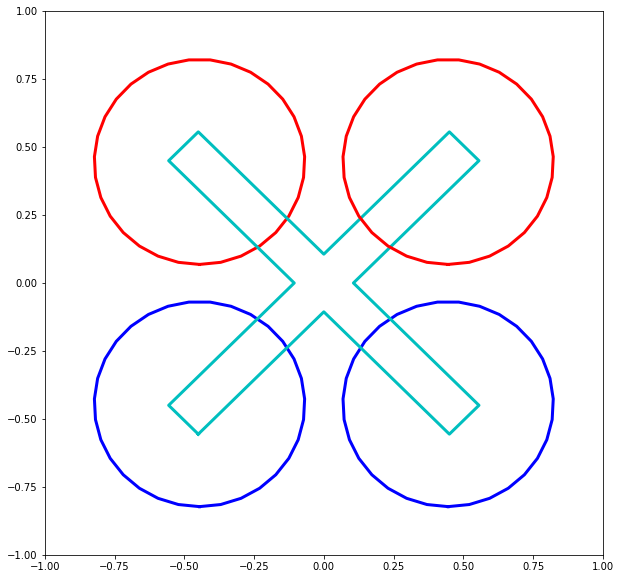

In [452]:
angle=(0,90*np.pi/180,0)
move=(2,0,0)
f=10

fig=plt.figure(figsize=(10, 10))
ax=fig.add_subplot()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

draw_obj(copter, move, angle, f, prop_loc_z, ax)

plt.show()


In [461]:
def make_animation_frame(copter, move, angle, f, prop_loc_z, index):
    fig=plt.figure(figsize=(19.20,10.80),facecolor='#EEEEEE',dpi=100)
    ax=fig.add_subplot()
    ax.set_position([0, 0, 1, 1])
    ax.axis("off")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2*1080/1920, 2*1080/1920)

    draw_obj(copter, move, angle, f, prop_loc_z, ax)

    plt.savefig('anim_img/anim_frame{:04d}'.format(index))
    #plt.show()
    plt.close()
    

def make_animation(copter, move, angles, index0):
    index=index0;
    for phi,theta,psi,x,y,z in zip(angles[0], angles[1], angles[2],move[0],move[1],move[2]):
        angle=(phi,theta,psi)
        move=(x,y,z)
        f=3.5

        make_animation_frame(copter, move, angle, f, 0.02,index)

        index=index+1
    return index

t=np.linspace(0,3,72)
mv=np.sin(2*np.pi*t/3)
phi=np.linspace(0,360*np.pi/180,24*3)
theta=np.linspace(0,360*np.pi/180,24*3)
psi=np.linspace(0,360*np.pi/180,24*3)
zero=np.zeros(24*3)

index=0
index=make_animation(copter,(2+zero,0.8*mv,zero),(phi,zero,zero), index)
index=make_animation(copter,(2+1.5*mv,zero,zero),(zero,theta,zero), index)
index=make_animation(copter,(2+zero,zero,0.5*mv),(zero,zero,psi), index)

